# ECC Demonstration

Import my ECC package into the environment

In [1]:
from ECC import *

### Key Generation
Declare the bit size we want to use

In [2]:
bitSize = 17

Generate a set of ECC keys with appropriate bitsize

In [3]:
ECC_keys = generate_ECC.KeyGen(bitSize, True, True)     # initalise object True sets verbose and demo flag on KeyGen
ECC_keys.generateCurve()                                # create a curve
ECC_keys.generateKeys()                                 # runs generator

Generating  17 bit prime... 
10 rounds of Miller-Rabin needed (according to FISC)
Trial-Division prime list generated, size:  54
New candidate... 109067
New candidate... 90833
Prime of  17 bits found: 90833
Checked 2 candidates in 0.00 s

Checking: y^2 = x^3 + 2x + 5 % 90833

y^2 = x^3 + 2x + 5 % 90833
Checked 1 curves
k = 72080  G = (78724, 73193)   Q = (83488, 69405)
Public-Key: {
    Curve: y^2 = x^3 + 2x + 5 % 90833
    Base-Point: (78724, 73193)
    Order(Base): 90644
    Public-Point: (83488, 69405)
}
Private-Key: 72080
n is 17 bits



True

### Brute Force Algorithm

Very trivial:

- Simply keep adding G to itself until we reach the required Q 
- $O(p)$ for prime $p$

In [4]:
# pass it public keys, and True verbose & demo flag
bf = brute_force.BFSolver(ECC_keys.curve, ECC_keys.Q, ECC_keys.G, True, True) 
# run solver
bf.solve()                                                                

'72080.G = (83488, 69405)'

k: 72080
Time taken: 1.967 s
Space used: 4 bytes
Numbers checked: 72080


True

### Pollard's-$\lambda$ method

An extremely probabilistic method:

- Based around setting a "trap"
- Which a "wild kangaroo" falls into
- The distance travelled before falling into the trap helps is calculate $k$
- Theoretically grows wit $O(\sqrt{p})$
- Often fails with the "wild kangaroo" entering a cycle in a safe zone

In [5]:
# pass it public keys, and True verbose & demo flag
lamb = pollard_lambda.PLSolver(ECC_keys.curve, ECC_keys.Q, ECC_keys.G, True, True) 
# run solver
lamb.solve()  

'Trap: (63695, 83354) Wild: (63695, 83354)'

k: 72080
Time taken: 9.203 s
Space used: 80 bytes
Numbers checked: 53630


True

### Make it a bit harder

In [6]:
bitSize = 26

ECC_keys = generate_ECC.KeyGen(bitSize, True)     # initalise object True sets verbose flag on KeyGen
ECC_keys.generateCurve()                          # create a curve
ECC_keys.generateKeys()                           # runs generator

Prime of  26 bits found: 53881679
Checked 1 candidates in 0.00 s

y^2 = x^3 + 9x + 1 % 53881679
Checked 1 curves
k = 44512673  G = (42876395, 52155345)   Q = (25500226, 14795013)
Public-Key: {
    Curve: y^2 = x^3 + 9x + 1 % 53881679
    Base-Point: (42876395, 52155345)
    Order(Base): 53876446
    Public-Point: (25500226, 14795013)
}
Private-Key: 44512673
n is 26 bits



True

### Baby Step - Giant Step Algorithm

This algorithm is essentialyl brute-force, trading space for time:

- We compute a hash table of results upto $s \leftarrow \sqrt{ord(G)}$
- Giant steps incremet $i$ calculating: $P \leftarrow Q - G.(i*s)$
- When $P$ is found in the hash table we calculate $k \leftarrow hash(P) + i*s$
- $O(\sqrt{p})$ for space and time complexity

In [7]:
# pass it public keys, and True verbose & demo flag
bsgs = baby_step.BGSolver(ECC_keys.curve, ECC_keys.Q, ECC_keys.G, True, True)    
# run solver
bsgs.solve()                                                              

'(25500226, 14795013) - (42876395, 52155345) * 44508483 = (31908980, 10725174)'

k: 44512673
Time taken: 3.947 s
Space used: 58736 bytes
Numbers checked: 13406


True

### Pohlig-Hellman

A "special purpose" algorithm:

- If $ord(G)$ is a "smoooth number" we can decompose the problem 
- Making new sub-problems over each of the prime factors
- Then recombine the solutions using the CRT
- It's time complexity grows with the square root of the largest prime factor of $ord(G)$.
- So worst case is $O(\sqrt{p})$ where $ord(G) \equiv p$

In [8]:
# pass it public keys, and True verbose & demo flag
ph = pohlig_hellman.PHSolver(ECC_keys.curve, ECC_keys.Q, ECC_keys.G, True, True) 
# run solver
ph.solve()  

{2: 1, 13: 1, 787: 1, 2633: 1}
2^1: G'=(40913498, 0) Q'=(40913498, 0); ord = 2
13^1: G'=(7065089, 43010861) Q'=(34792275, 1336071); ord = 13
787^1: G'=(36631498, 52738686) Q'=(35613444, 20828740); ord = 787
2633^1: G'=(40080808, 21480280) Q'=(9571271, 28661593); ord = 2633
k: 44512673
Time taken: 0.022 s
Space used: 110
Numbers checked: 153


True

### Pollard's-$\rho$ method

Same as for the IFP:

- We aim to find two sets of numbers such that $a.G + b.Q = a'.G + b'.Q$, which rearranges to give us: $k \leftarrow \frac{a-a'}{b'-b} \; mod \; ord(G)$
- Found by generating a repeatable random sequence of points, which according to the birthday paradox must eventually cycle
- Send two runners around one twice as fast as the other to detect cycle 
- $O(\sqrt{p})$ according to birthday paradox
- But each "check" is only an addition not multiplication, so much faster

In [9]:
# pass it public keys, and True verbose & demo flag
rho = pollard_rho.PRSolver(ECC_keys.curve, ECC_keys.Q, ECC_keys.G, True, True)   
# run solver
rho.solve()                                                                

'X: (27671808, 10329813) Y: (27671808, 10329813)'

k: 44512673
Time taken: 5.802 s
Space used: 72 bytes
Numbers checked: 59606


True

### MOV Attack

Maps the ECDLP to the DLP:

- Works for a very small number of curves, which have a small embedding degree
- $\epsilon$, where $\epsilon$ is the lowest integer satisfying $p^{\epsilon} - 1 / card(E) \in N$ ($p$ is prime, $E$ is a curve over ${\bf F}_p$ and $card(E)$ is the number of points on the curve)
- Extremely efficient (subexponential) if it works
- But works for exponentially increasing amount of numbers 

In [2]:
from IPython.display import display, clear_output

solved = False
bitSize = 12

while not solved:
    clear_output(wait=True)
    
    ECC_keys = generate_ECC.KeyGen(bitSize, True)     # initalise object True sets verbose flag on KeyGen
    ECC_keys.generateCurve()                          # create a curve
    ECC_keys.generateKeys()                           # runs generator

    # pass it public keys, and True verbose & demo flag
    mov = mov_attack.MOVSolver(ECC_keys.curve, ECC_keys.Q, ECC_keys.G, True, True) 
    # run solver
    mov.solve()  
    
    solved = mov.k == ECC_keys.k

Prime of  12 bits found: 2707
Checked 1 candidates in 0.00 s

y^2 = x^3 + 8x % 2707
Checked 1 curves
k = 1119  G = (1378, 2436)   Q = (1988, 990)
Public-Key: {
    Curve: y^2 = x^3 + 8x % 2707
    Base-Point: (1378, 2436)
    Order(Base): 1354
    Public-Point: (1988, 990)
}
Private-Key: 1119
n is 12 bits

2240*a + 485 861*a + 2487 2708
k: 1119
Time taken: 0.003 s
Space used: 31684 bytes
Numbers checked: 89


### Basic Analysis
Running the above algorithms on a variety of random inputs to create graphs showing general trends.

The below style code makes the format of the graphs nicer

In [3]:
%%html
<style>
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: none;
}
</style>

Runs each algorithm in a thread and plots the results.

<IPython.core.display.Javascript object>


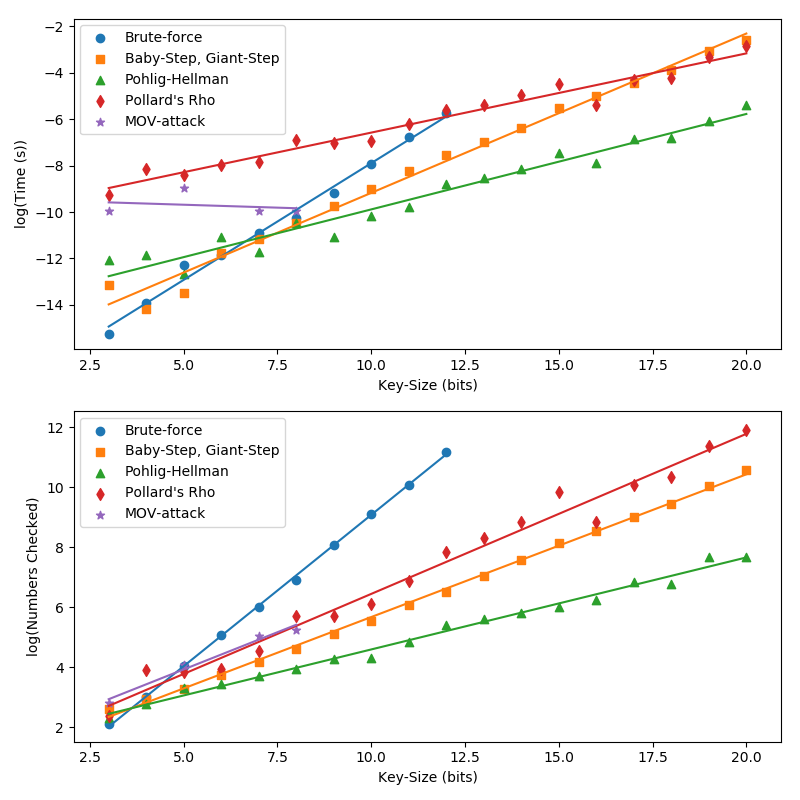

Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid parameters
Invalid para

In [4]:
%matplotlib notebook
from graphs_ECC import *

minBit = 3
bf_bit = 13
bsgs_bit = 21
ph_bit = 21
rho_bit = 21
mov_bit = 21

testGraphs(minBit, bf_bit, bsgs_bit, ph_bit, rho_bit, mov_bit)

<img src="imgs/ECC.png" alt="drawing" style="width:80%;"/>

## Try it yourself

Below you can select which solvers you want to use and enter your own curve to test against the solvers

In [5]:
from ECC.curves import * 

# SET YOUR OWN CURVE IN WEIERSTRASS FORM E: y^2 = x^3 + ax + b (mod fp)
a = 59
b = 23
fp = 2153

# CREATE CURVE
C = Curve(a, b, fp)  

# GET GENERATOR POINT
G = C.getG()
print("Generator point:", G)

if G:
    ordG = C.order(G)
    print("Of order:", C.order(G))

    # SET k AND CALCULATE PUBLIC POINT 
    k = 135
    Q = G * k
    print("Public point:", Q)

    # PACKAGE ALL INTO KEY CLASS
    ECC_keys = generate_ECC.KeyGen(verbose = True)
    ECC_keys.setCurve(C)
    ECC_keys.setG(G)
    ECC_keys.setQ(Q)
    ECC_keys.setK(k)

Generator point: (225, 1072)
Of order: 2185
Public point: (397, 2087)


In [6]:
import run_ECC

# SET SOLVERS ON/OFF 
bf = True     # brute-force
bsgs = True   # baby-step giant-step
pr = True     # pollard's - rho
pl = True     # pollard's lambda
ph = True     # pohlig-hellman
mov = True    # mov-attack

# PASS KEYS TO SOLVER
run_ECC.runSolvers(ECC_keys, bf, bsgs, pr, pl, ph, mov)

========== BRUTE FORCE ==========
k: 135
Time taken: 0.003 s
Space used: 4 bytes
Numbers checked: 135
Success!
========== BABYSTEP_GIANTSTEP ==========
k: 135
Time taken: 0.002 s
Space used: 384 bytes
Numbers checked: 51
Success!
========== POLLARD'S RHO ==========
k: 135
Time taken: 0.021 s
Space used: 72 bytes
Numbers checked: 139
Success!
========== POLLARD'S LAMBDA ==========
k: 135
Time taken: 0.063 s
Space used: 80 bytes
Numbers checked: 1942
Success!
========== POHLIG HELLMAN ==========
{5: 1, 19: 1, 23: 1}
k: 135
Time taken: 0.001 s
Space used: 15
Numbers checked: 22
Success!
========== MOV ATTACK ==========
Not Suceptible to MOV attack
Fail!
